## Problem Information

An Ecommerce company for an online clothing business wants to identify if customers use more of either the mobile or web app to make orders, in order to decide which of the two to improve on.

###### Note: The dataset set is from the linear regression exercise by Jose Portilla. It can be found on https://www.udemy.com/share/101WaU3@t1Dn3NjLD3OchinqvoeiIBfcJqrSgk_DGBpKeOo3z569lG5br-eKlQWdX-7ZroH8/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

## The Data

The Ecommerce customers csv file contains customers info like Emails, Addresses, as well as numerical value columns with the following information:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.info()  

#Important to check number of rows, columns, and possibilities of null values within the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
customers.head()  

#A deeper check into the values/strings contained in each column of the dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

#A peep into the numerical observation of each numerical data column

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

We could already try to begin to get insights into correlation amongst information within the dataset, prior to modelling.

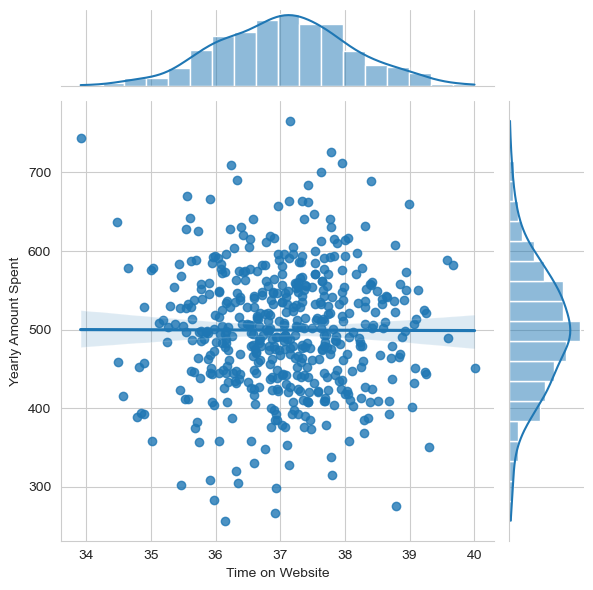

In [6]:
#Does the amount of time spent by customers on the company's website have a correlation with amount spent, and ultimately the company's revenue?

sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = customers, kind = "reg")

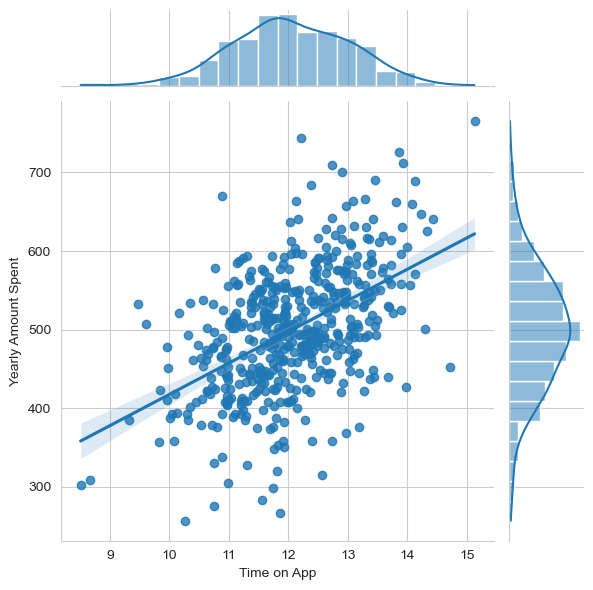

In [7]:
#Does the amount of time spent by customers on the company's mobile appp have a correlation with amount spent, and ultimately the company's revenue?

sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = customers, kind = "reg")

We could already observe that spending more time on the mobile app could improve the company's revenue than spending time on website. 

It becomes intuitive to see if there are other part(s) of the dataset that influences time spent on mobile app.

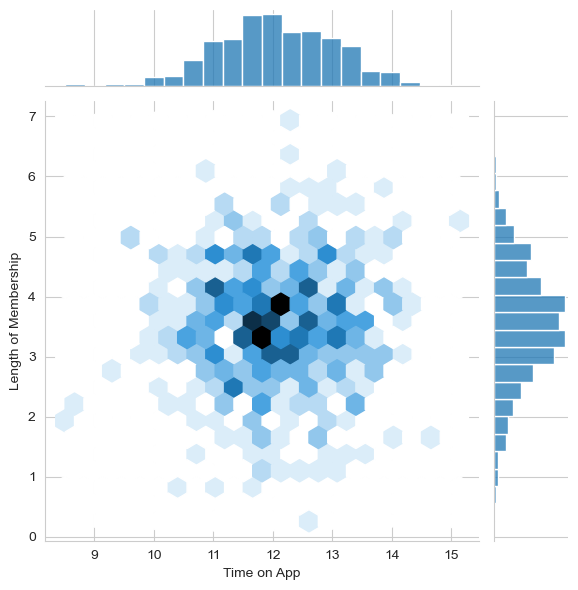

In [8]:
#Does the length of membership influence the time spent by customers on mobile app?

sns.jointplot(x = "Time on App", y = "Length of Membership", data = customers, kind = "hex")

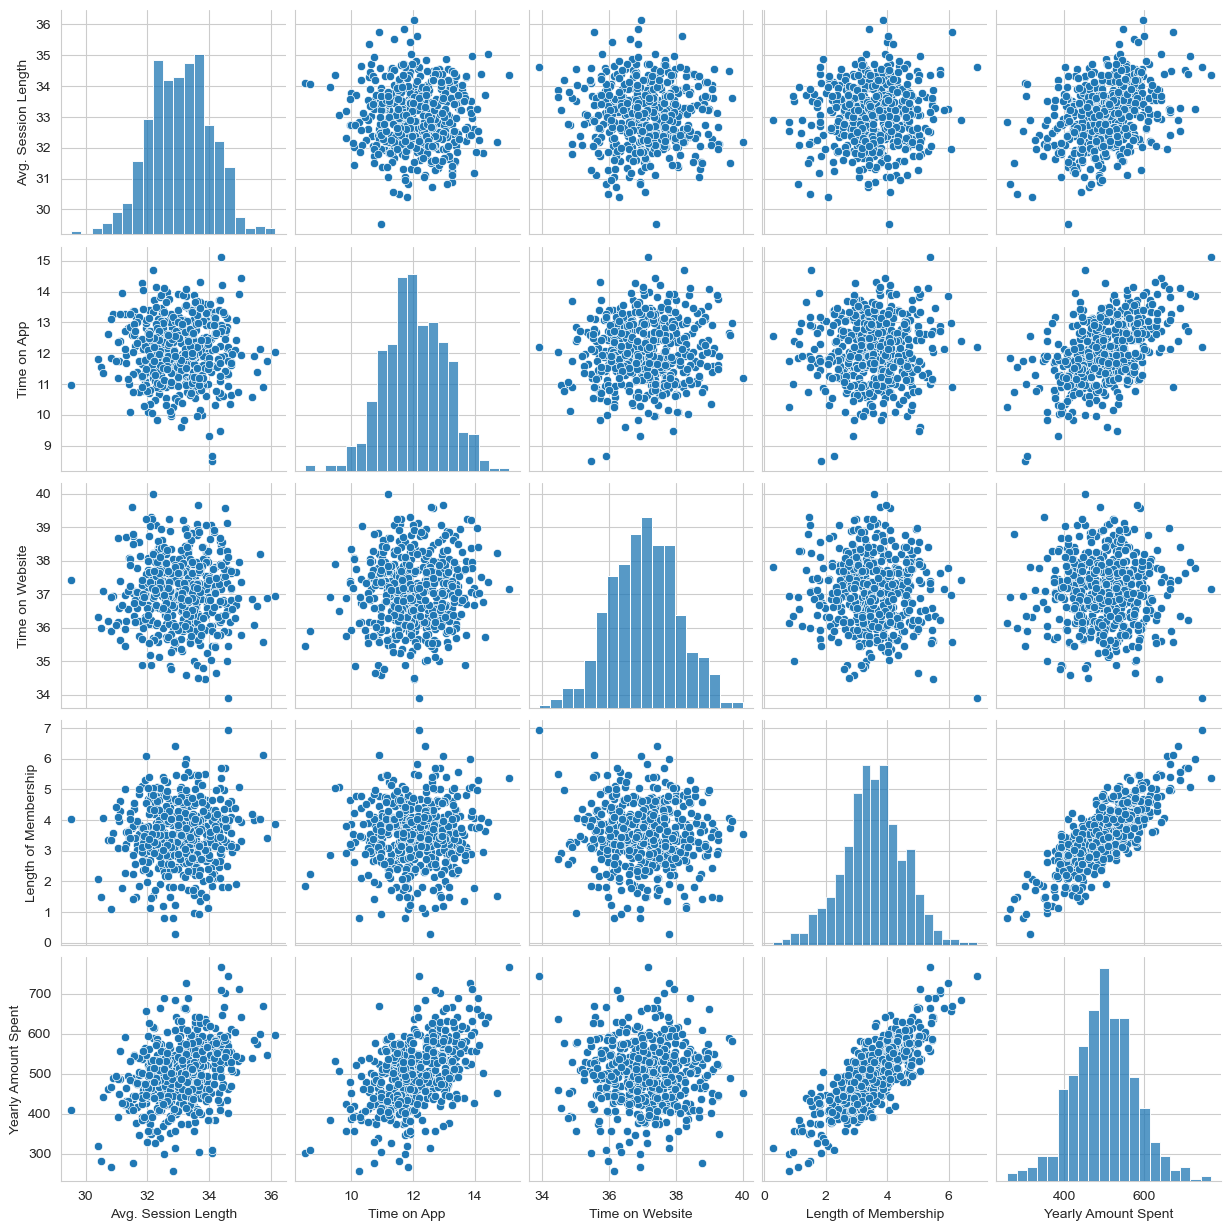

In [9]:
sns.pairplot(customers)

#A further look into correlation and relationship amongst all numerical information within the dataset.

##### We could already observe "length of membership" having the strongest correlation with the "yearly amount spent"

In [10]:
#It is intuitive to do a numerical observation of correlation with "yearly amount spent", to understand strongly the effect of "length of membership"

customers.corr()["Yearly Amount Spent"]

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

<AxesSubplot:>

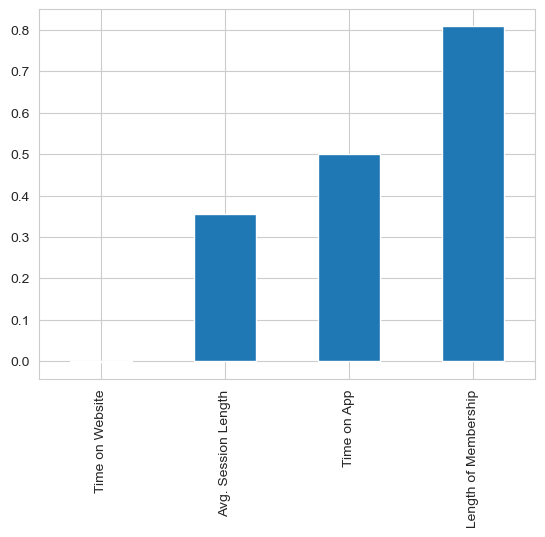

In [11]:
customers.corr()["Yearly Amount Spent"].sort_values()[:-1].plot(kind = "bar")

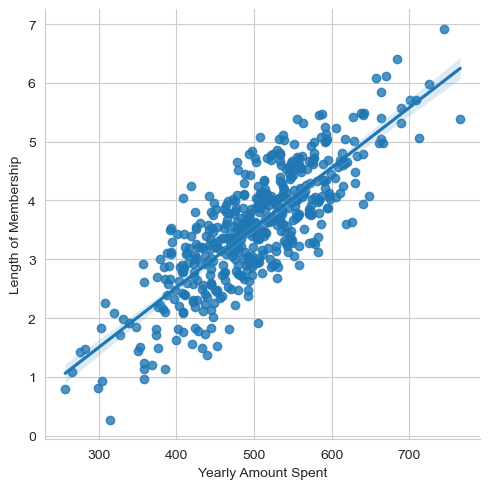

In [12]:
#A linear plot would do an even greater revelation

sns.lmplot(x = "Yearly Amount Spent", y = "Length of Membership", data = customers)

#### Now that we have a better insight into the dataset, we could go ahead and build our model

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
#Are there columns containing string variables?

customers.select_dtypes(include = "object").columns

Index(['Email', 'Address', 'Avatar'], dtype='object')

In [15]:
customers.drop(["Email", "Address", "Avatar"], axis = 1, inplace = True)

In [16]:
X = customers.drop("Yearly Amount Spent", axis = 1)

y = customers["Yearly Amount Spent"]  #our label feature

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Let's train the model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
#Let's examine the corresponding coefficients for our features/predictors

coeffs =  pd.DataFrame(data = lm.coef_, index = X.columns, columns = ["Coefficients"])

In [23]:
coeffs

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Now that we have fitted our model, let's predict some test yearly amount spent values

In [24]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y values')

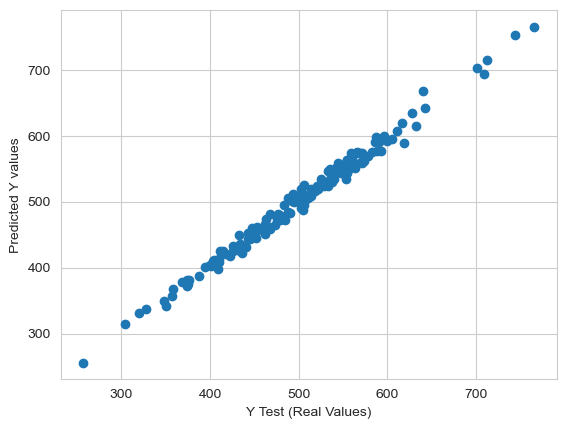

In [25]:
#Good to examine a comparative plot of the predicted label values and their true values

plt.scatter(y_test, predictions)
plt.xlabel("Y Test (Real Values)")
plt.ylabel("Predicted Y values")

#### A linear relationship of the predictions and true label values already gives an insight into how well our model has performed

### Numerical Evaluation of the Model Performance

In [26]:
from sklearn import metrics

In [27]:
#The explained variance score could be important to tell how well our model fits the dataset

metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

In [28]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.2281486534308295
Mean Squared Error: 79.81305165097442
Root Mean Squared Error: 8.933815066978632


#### Observe the Residuals

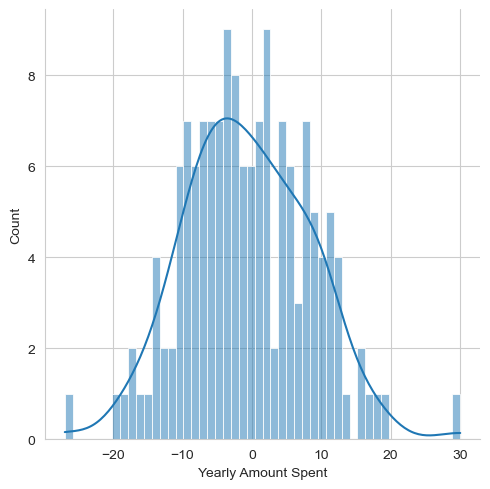

In [29]:
sns.displot(y_test - predictions, bins = 50, kde = True)

##### A normal distrubution of the residual plot assures the model being fit for our data

In [30]:
#Observe again our coefficients, to understand the extent of effect on the revenue generated by the Ecommerce firm

coeffs

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Depending on what the company is trying to achieve - either to up the performance of lagging features or continue to improve on already performing ones, we understand how well each of the features given in the dataset contributes to the revenue generated by the company.